In [36]:
import pandas as pd
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :]

In [50]:
train = pd.read_csv('./data/train/train.csv')

test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    test.append(temp)

df_test = pd.concat(test)

submission = pd.read_csv('./data/sample_submission.csv')

In [51]:
df_train = preprocess_data(train)

df_train.shape, df_test.shape

((52464, 9), (3888, 7))

In [52]:
display(df_train.describe())
display(df_test.describe())

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
count,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000
mean,11.500000,17.805046,64.413789,234.772797,2.455596,56.795208,9.297842,17.809249,17.807131
std,6.922253,25.773161,103.963326,349.685953,1.427477,22.065222,10.179041,25.774762,25.773169
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.400000,39.667500,1.000000,0.000000,0.000000
50%,11.500000,0.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000,0.000000
75%,17.250000,32.096062,87.000000,469.000000,3.200000,72.780000,17.000000,32.182481,32.180978
max,23.000000,99.913939,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939,99.913939


,Hour,TARGET,DHI,DNI,WS,RH,T
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,11.500000,18.574770,56.667953,260.021348,2.272814,46.117384,9.525849
std,6.923077,26.649817,88.544167,367.031200,1.235455,20.003953,11.633382
min,0.000000,0.000000,0.000000,0.000000,0.100000,6.750000,-15.700000
25%,5.750000,0.000000,0.000000,0.000000,1.300000,30.027500,-0.200000
50%,11.500000,0.563108,6.000000,0.000000,2.100000,46.700000,8.500000
75%,17.250000,33.026094,79.000000,546.000000,3.000000,60.630000,18.500000
max,23.000000,98.879790,502.000000,1066.000000,7.300000,90.910000,36.700000


In [53]:
min = df_train[['Hour','DHI','DNI','WS','RH','T']].min()
max  = df_train[['Hour','DHI','DNI','WS','RH','T']].max()

In [54]:
for i, col in enumerate(['Hour','DHI','DNI','WS','RH','T']):
    df_train[col] = (df_train[col] - min[i]) / (max[i] - min[i])
    df_test[col] = (df_test[col] - min[i]) / (max[i] - min[i])

In [55]:
display(df_train.describe())
display(df_test.describe())

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
count,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000
mean,0.500000,17.805046,0.121996,0.221693,0.204633,0.532466,0.524034,17.809249,17.807131
std,0.300968,25.773161,0.196900,0.330204,0.118956,0.238775,0.188501,25.774762,25.773169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.116667,0.347122,0.370370,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.183333,0.541175,0.518519,0.000000,0.000000
75%,0.750000,32.096062,0.164773,0.442871,0.266667,0.705443,0.666667,32.182481,32.180978
max,1.000000,99.913939,1.000000,1.000000,1.000000,1.000000,1.000000,99.913939,99.913939


,Hour,TARGET,DHI,DNI,WS,RH,T
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,0.500000,18.574770,0.107326,0.245535,0.189401,0.416918,0.528256
std,0.301003,26.649817,0.167697,0.346583,0.102955,0.216470,0.215433
min,0.000000,0.000000,0.000000,0.000000,0.008333,-0.009090,0.061111
25%,0.250000,0.000000,0.000000,0.000000,0.108333,0.242804,0.348148
50%,0.500000,0.563108,0.011364,0.000000,0.175000,0.423223,0.509259
75%,0.750000,33.026094,0.149621,0.515581,0.250000,0.573964,0.694444
max,1.000000,98.879790,0.950758,1.006610,0.608333,0.901634,1.031481


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_train[['Hour','DHI','DNI','WS','RH','T']])
df_test[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_test[['Hour','DHI','DNI','WS','RH','T']])

In [56]:
Day  = df_train.iloc[:, :-2]
Day7 = df_train.iloc[:, -2]
Day8 = df_train.iloc[:, -1]

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.backend import mean, maximum

tf.random.set_seed(42)

In [30]:
def quantile_loss(q, y, pred):
    err = (y-pred)
    return mean(maximum(q*err, (q-1)*err), axis=-1)

In [31]:
q_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [57]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(Day, Day7, test_size=0.25, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(Day, Day8, test_size=0.25, random_state=0)

X_train_1.shape, X_valid_1.shape, Y_train_1.shape, Y_valid_1.shape

((39348, 7), (13116, 7), (39348,), (13116,))

In [101]:
model7 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(Day.shape)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model8 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(Day.shape)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [102]:
epoch = 200

In [103]:
model7.compile(loss='mse', optimizer='adam')
hist7 = model7.fit(X_train_1, Y_train_1, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
model7.evaluate(X_valid_1, Y_valid_1)

Epoch 1/200
615/615 [==============================] - 1s 1ms/step - loss: 290.9855 - val_loss: 172.1410
Epoch 2/200
615/615 [==============================] - 1s 1ms/step - loss: 157.6949 - val_loss: 157.3001
Epoch 3/200
615/615 [==============================] - 1s 1ms/step - loss: 150.1205 - val_loss: 155.6187
Epoch 4/200
615/615 [==============================] - 1s 1ms/step - loss: 145.4811 - val_loss: 154.5118
Epoch 5/200
615/615 [==============================] - 1s 1ms/step - loss: 145.0549 - val_loss: 151.4590
Epoch 6/200
615/615 [==============================] - 1s 1ms/step - loss: 142.8640 - val_loss: 152.5827
Epoch 7/200
615/615 [==============================] - 1s 1ms/step - loss: 141.4223 - val_loss: 148.2641
Epoch 8/200
615/615 [==============================] - 1s 1ms/step - loss: 142.1691 - val_loss: 147.2917
Epoch 9/200
615/615 [==============================] - 1s 1ms/step - loss: 138.6315 - val_loss: 152.0377
Epoch 10/200
615/615 [==============================] -

138.2886199951172

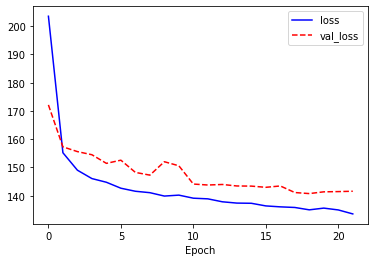

In [104]:
plt.plot(hist7.history['loss'], 'b-', label='loss')
plt.plot(hist7.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [105]:
model8.compile(loss='mse', optimizer='adam')
hist8 = model8.fit(X_train_2, Y_train_2, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
model8.evaluate(X_valid_2, Y_valid_2)

Epoch 1/200
615/615 [==============================] - 1s 2ms/step - loss: 286.1672 - val_loss: 185.6512
Epoch 2/200
615/615 [==============================] - 1s 1ms/step - loss: 169.6621 - val_loss: 164.1903
Epoch 3/200
615/615 [==============================] - 1s 1ms/step - loss: 164.8219 - val_loss: 161.6875
Epoch 4/200
615/615 [==============================] - 1s 1ms/step - loss: 161.5434 - val_loss: 162.3787
Epoch 5/200
615/615 [==============================] - 1s 1ms/step - loss: 160.7899 - val_loss: 159.8137
Epoch 6/200
615/615 [==============================] - 1s 1ms/step - loss: 155.6063 - val_loss: 165.0038
Epoch 7/200
615/615 [==============================] - 1s 1ms/step - loss: 157.6903 - val_loss: 162.0622
Epoch 8/200
615/615 [==============================] - 1s 1ms/step - loss: 153.1129 - val_loss: 157.1474
Epoch 9/200
615/615 [==============================] - 1s 1ms/step - loss: 153.3076 - val_loss: 154.5683
Epoch 10/200
615/615 [==============================] -

148.2867431640625

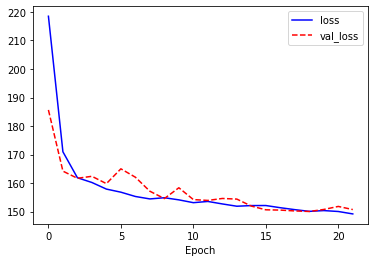

In [106]:
plt.plot(hist8.history['loss'], 'b-', label='loss')
plt.plot(hist8.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [107]:
results7 = pd.DataFrame()

for q in q_lst:
    model7.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model7.fit(Day, Day7, epochs=epoch, batch_size=48, validation_split=0.25, 
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
    pred = pd.DataFrame(model7.predict(df_test))
    results7 = pd.concat([results7, pred], axis=1)

results7.shape

Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 1.5121 - val_loss: 1.5979
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4068 - val_loss: 1.6015
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4002 - val_loss: 1.5931
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 1.3968 - val_loss: 1.5868
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4044 - val_loss: 1.5893
Epoch 6/200
820/820 [==============================] - 1s 1ms/step - loss: 1.3938 - val_loss: 1.6065
Epoch 7/200
820/820 [==============================] - 1s 1ms/step - loss: 1.3944 - val_loss: 1.6046
Epoch 00007: early stopping
Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 2.2328 - val_loss: 2.5840
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 2.2136 - val_loss: 2.5723
Epoch 3/200
820/820 [==============================] - 1s 1ms/s

Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 2.6155 - val_loss: 2.9210
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 2.5668 - val_loss: 2.9199
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 2.5709 - val_loss: 2.9506
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 2.5620 - val_loss: 2.9561
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 2.5770 - val_loss: 2.9725
Epoch 00005: early stopping
Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 2.3210 - val_loss: 2.6309
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 2.2916 - val_loss: 2.6273
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 2.2965 - val_loss: 2.6426
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 2.2829 - val_loss: 2.6454
Epoch 5/200
820/820 [==============================] - 1s 1ms/s

820/820 [==============================] - 1s 1ms/step - loss: 1.3774 - val_loss: 1.5985
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 1.3737 - val_loss: 1.6075
Epoch 00005: early stopping
Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 0.7905 - val_loss: 0.8807
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 0.7771 - val_loss: 0.8645
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 0.7766 - val_loss: 0.8790
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 0.7774 - val_loss: 0.8857
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 0.7750 - val_loss: 0.8701
Epoch 00005: early stopping


(3888, 9)

In [108]:
results8 = pd.DataFrame()

for q in q_lst:
    model8.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model8.fit(Day, Day8, epochs=epoch, batch_size=48, validation_split=0.25, 
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
    pred = pd.DataFrame(model8.predict(df_test))
    results8 = pd.concat([results8, pred], axis=1)

results8.shape

Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 1.5564 - val_loss: 1.6315
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4407 - val_loss: 1.6214
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4222 - val_loss: 1.6221
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4116 - val_loss: 1.6295
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4282 - val_loss: 1.6208
Epoch 6/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4230 - val_loss: 1.6281
Epoch 7/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4290 - val_loss: 1.6258
Epoch 8/200
820/820 [==============================] - 1s 1ms/step - loss: 1.4308 - val_loss: 1.6300
Epoch 00008: early stopping
Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 2.3684 - val_loss: 2.6649
Epoch 2/200
820/820 [==============================] - 1s 1ms/s

Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 2.8301 - val_loss: 3.1356
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 2.8044 - val_loss: 3.1558
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 2.7905 - val_loss: 3.1109
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 2.7920 - val_loss: 3.1723
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 2.7982 - val_loss: 3.1232
Epoch 6/200
820/820 [==============================] - 1s 1ms/step - loss: 2.7662 - val_loss: 3.1051
Epoch 7/200
820/820 [==============================] - 1s 1ms/step - loss: 2.8101 - val_loss: 3.1592
Epoch 8/200
820/820 [==============================] - 1s 1ms/step - loss: 2.8094 - val_loss: 3.1253
Epoch 9/200
820/820 [==============================] - 1s 1ms/step - loss: 2.7699 - val_loss: 3.1227
Epoch 00009: early stopping
Epoch 1/200
820/820 [==============================] - 1s 1ms/s

Epoch 1/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8332 - val_loss: 0.9155
Epoch 2/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8229 - val_loss: 0.9502
Epoch 3/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8215 - val_loss: 0.9335
Epoch 4/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8161 - val_loss: 0.9035
Epoch 5/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8115 - val_loss: 0.9067
Epoch 6/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8043 - val_loss: 0.9010
Epoch 7/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8250 - val_loss: 0.8919
Epoch 8/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8151 - val_loss: 0.9194
Epoch 9/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8039 - val_loss: 0.9246
Epoch 10/200
820/820 [==============================] - 1s 1ms/step - loss: 0.8183 - val_lo

(3888, 9)

In [109]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results7.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results8.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.061934,-0.011903,0.008592,-0.015341,0.006728,-0.038185,0.040787,0.056246,0.242024
1,0.csv_Day7_0h30m,-0.062486,-0.012097,0.008904,-0.014155,0.008415,-0.037033,0.041109,0.055946,0.241644
2,0.csv_Day7_1h00m,-0.070420,-0.010411,0.006789,-0.013981,0.008762,-0.029789,0.036146,0.048518,0.227974
3,0.csv_Day7_1h30m,-0.069756,-0.010570,0.006297,-0.014618,0.008099,-0.030069,0.036074,0.048727,0.228299
4,0.csv_Day7_2h00m,-0.073604,-0.008607,0.004982,-0.012723,0.007496,-0.028681,0.030716,0.041663,0.214982
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,-0.116413,-0.018166,-0.007503,0.074261,0.105407,-0.000993,0.113580,0.090838,0.105839
7772,80.csv_Day8_22h00m,-0.116266,-0.024115,-0.005273,0.069542,0.106908,0.001068,0.114782,0.084247,0.104431
7773,80.csv_Day8_22h30m,-0.115014,-0.022282,-0.005397,0.070075,0.104404,0.000736,0.115014,0.084729,0.104689
7774,80.csv_Day8_23h00m,-0.117266,-0.027158,-0.003508,0.068223,0.106236,0.002868,0.116261,0.075754,0.103112


In [110]:
submission.to_csv('./submission/submission_20210117-1.csv', index=False)